<a href="https://colab.research.google.com/github/YuxingW/deep_learning/blob/main/hw3/part_b2_pytorch_auto_differentiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Pytorch tensor data structure with auto differentiation

In [1]:
%matplotlib inline
import numpy as np
import torch
torch.set_printoptions(edgeitems=2, linewidth=75)

#### 3d-2d non-linear data generation

If x is numpy array this will apply auto differentiation requires_grad to torch tensor:<br />
torch.tensor(x, requires_grad=True)


In [2]:
n = 200
d = 3

x = np.random.uniform(-1, 1, (n, d))

weights_true = np.array([[3, 1, -1],[2, 0, -2],]).T
bias_true = np.array([0.5, 0.1])

y = (x ** 2) @ weights_true + x @ weights_true + bias_true
x = torch.tensor(x, requires_grad=True)
y = torch.tensor(y, requires_grad=True)

print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y.shape}')

x: torch.Size([200, 3]), weights: (3, 2), bias: (2,), y: torch.Size([200, 2])


#### Define model and loss

In [3]:
def model(x, weights, bias):
    return torch.mm(x ** 2, weights) + torch.mm(x, weights) + bias

In [4]:
def loss_fn(y_pred, y_true):
    squared_diffs = (y_pred - y_true)**2
    return squared_diffs.mean()

####Initialize weights and bias for model

In [5]:
bias = np.array([0.1, 0.1])
bias = torch.tensor(bias, requires_grad=True)

weights = np.array([[1.0, 1.0, 1.0],[1.0, 1.0, 1.0],]).T
weights = torch.tensor(weights, requires_grad=True)

In [6]:
import torch.optim as optim

####Initialize learning rate and optimizer

In [7]:
learning_rate = 1e-3
optimizer = optim.SGD([weights, bias,], lr=learning_rate)

####Do one step training

In [8]:
y_pred = model(x, weights, bias)
loss = loss_fn(y_pred, y)
loss.backward()

optimizer.step()

y_pred.shape

torch.Size([200, 2])

####Do training loop with eporches

In [9]:
def training_loop(n_epochs, optimizer, weights, bias, x, y):
    for epoch in range(1, n_epochs + 1):
        y_pred = model(x, weights, bias) 
        loss = loss_fn(y_pred, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 1000 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return y_pred

In [10]:
y_pred = training_loop(
    n_epochs = 20000, 
    optimizer = optimizer,
    weights = weights,
    bias = bias,
    x = x,
    y = y)

Epoch 1000, Loss 1.648788
Epoch 2000, Loss 0.725915
Epoch 3000, Loss 0.327646
Epoch 4000, Loss 0.149054
Epoch 5000, Loss 0.068257
Epoch 6000, Loss 0.031471
Epoch 7000, Loss 0.014614
Epoch 8000, Loss 0.006837
Epoch 9000, Loss 0.003224
Epoch 10000, Loss 0.001532
Epoch 11000, Loss 0.000734
Epoch 12000, Loss 0.000355
Epoch 13000, Loss 0.000173
Epoch 14000, Loss 0.000085
Epoch 15000, Loss 0.000042
Epoch 16000, Loss 0.000021
Epoch 17000, Loss 0.000011
Epoch 18000, Loss 0.000005
Epoch 19000, Loss 0.000003
Epoch 20000, Loss 0.000001


####Plot y_true y_pred using TSNE

In [11]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def plot_comparison(y_true, y_pred):
  #tsne = TSNE(n_components=2, perplexity=50, learning_rate=100, random_state=120)
  tsne = TSNE(n_components=2, random_state=0)
  yt_2d = tsne.fit_transform(y_true)
  yp_2d = tsne.fit_transform(y_pred)

  plt.figure(figsize=(6, 5))
  plt.scatter(yt_2d[:, 0], yt_2d[:, 1], c='b', label='y_true')
  plt.scatter(yp_2d[:, 1], yp_2d[:, 1], c='y', label='y_pred')
  plt.legend()
  plt.title('TSNE Y_True Y_Pred Comparison')
  plt.xlabel('t_SNE1')
  plt.xlabel('t_SNE2')
  plt.show()

def plot_distribution(x, y_true, y_pred):
  tsne = TSNE(n_components=1, random_state=0)
  x_2d = tsne.fit_transform(x)
  yt_2d = tsne.fit_transform(y_true)
  yp_2d = tsne.fit_transform(y_pred)

  plt.figure(figsize=(6, 5))
  plt.scatter(x_2d[:, 0], yt_2d[:, 0], c='b', label='y_true')
  plt.scatter(x_2d[:, 0], yp_2d[:, 0], c='y', label='y_pred')
  plt.legend()
  plt.title('TSNE Y_True Y_Pred Distribution with X')
  plt.show()

def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='y_true')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='y_pred')
  plt.legend()

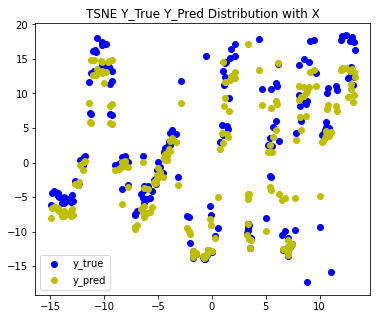

In [12]:
plot_distribution(x.detach().numpy(), y.detach().numpy(), y_pred.detach().numpy())

In [13]:
y_pred.shape

torch.Size([200, 2])

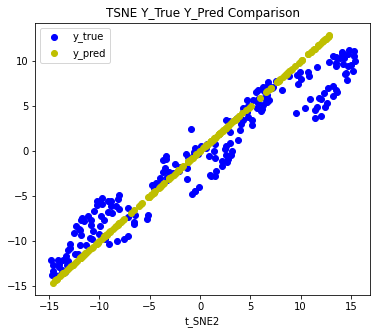

In [14]:
plot_comparison(y.detach().numpy(), y_pred.detach().numpy())

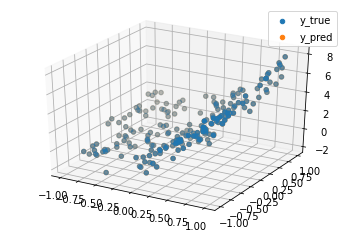

In [15]:
y_pred_np = y_pred.detach().numpy()
y_true_np = y.detach().numpy()
plot_3d(x.detach().numpy(), y_true_np[:, 0], y_pred=y_pred_np[:, 0])